## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## to display multiple output in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load Data

It is an HR Analytics Dataset where Job Change of Data Scientists are predicted.
Given the Features we have to predict whether the person is looking for job change or not?

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,salary
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1,1326
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0,1164
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0,1068
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1,940
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0,950


In [ ]:
#Basic Exploration
data.shape

(8999, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8999 non-null   int64  
 1   city                    8999 non-null   object 
 2   city_development_index  8919 non-null   float64
 3   gender                  6921 non-null   object 
 4   relevent_experience     8999 non-null   object 
 5   enrolled_university     8818 non-null   object 
 6   education_level         8793 non-null   object 
 7   major_discipline        7670 non-null   object 
 8   experience              8975 non-null   object 
 9   company_size            4001 non-null   object 
 10  company_type            6111 non-null   object 
 11  last_new_job            8793 non-null   object 
 12  training_hours          8945 non-null   float64
 13  target                  8999 non-null   int64  
 14  salary                  8999 non-null   

In [ ]:
data.describe()

,enrollee_id,city_development_index,training_hours,target,salary
count,8999.000000,8919.000000,8945.000000,8999.000000,8999.000000
mean,16894.129570,0.829062,65.599888,0.248028,1193.407045
std,9650.184757,0.122769,59.584974,0.431892,828.587309
min,2.000000,0.448000,1.000000,0.000000,257.000000
25%,8622.500000,0.740000,23.000000,0.000000,946.000000
50%,16884.000000,0.903000,48.000000,0.000000,1081.000000
75%,25318.500000,0.920000,90.000000,0.000000,1217.000000
max,33380.000000,0.949000,336.000000,1.000000,6779.000000


Only gave description of the numerical values like int,float. Put `include= 'all'` to get description of all variables.

In [ ]:
data.describe(include = 'all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,salary
count,8999.000000,8999,8919.000000,6921,8999,8818,8793,7670,8975,4001,6111,8793,8945.000000,8999.000000,8999.000000
unique,NaN,117,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN,NaN
freq,NaN,2021,NaN,6269,6472,6482,5430,6809,1523,973,4589,3736,NaN,NaN,NaN
mean,16894.129570,NaN,0.829062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.599888,0.248028,1193.407045
std,9650.184757,NaN,0.122769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.584974,0.431892,828.587309
min,2.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,257.000000
25%,8622.500000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000,946.000000
50%,16884.000000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,0.000000,1081.000000
75%,25318.500000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,0.000000,1217.000000


## Drop Duplicate entries

In [ ]:
data[data[list(set(data.columns) - set(['enrollee_id']))].duplicated() == True]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,salary


In [ ]:
data.drop(data[data[list(set(data.columns) - set(['enrollee_id']))].duplicated() == True].index, inplace=True)

In [ ]:
data[data[list(set(data.columns) - set(['enrollee_id']))].duplicated() == True]
data.shape

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,salary


(8999, 15)

In [ ]:
f'{8999 - 8968} were duplicate entries. Same way we can check and drop duplicate columns'

'31 were duplicate entries. Same way we can check and drop duplicate columns'

In [ ]:
data.nunique()

enrollee_id               8984
city                       117
city_development_index      88
gender                       3
relevent_experience          2
enrolled_university          3
education_level              5
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             241
target                       2
salary                    1059
dtype: int64

## Type of Variables

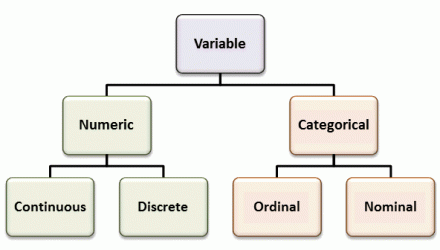

Categorical variables/features are any feature type can be classified into two major types:
- Nominal
- Ordinal
<p><b>Nominal variables</b> have two or more categories which do not have any kind of order associated with them. For example, gender is classified into two groups, i.e. male and female.
</p>
<p><b>Ordinal variables</b> have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable is a feature with three different levels: low, medium and high. Order is important.
</p>

List of ordinal variables in this data

- education_level
- company_size
- experience
- last_new_job
- company_type

In [ ]:
data['education_level'].value_counts()

Graduate          5430
Masters           2046
High School        971
Phd                203
Primary School     143
Name: education_level, dtype: int64

## Check missing values

In [ ]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index      80
gender                    2078
relevent_experience          0
enrolled_university        181
education_level            206
major_discipline          1329
experience                  24
company_size              4998
company_type              2888
last_new_job               206
training_hours              54
target                       0
salary                       0
dtype: int64

### Ways to impute missing values

#### <b>Do Nothing </b>
- Some algorithms can handle missing values and learn the best imputation values for the missing data based on the training loss (like Xgboost and LightGbm). Other's will throw an Error like LinearRegression

For `Experience` feature we will do nothing.

#### <b>Replace with "None" Category :</b> 
- Missing values can be of good insight to predict the target label so gave missing values it's own category named `None` . 

For example- if person doesn't gave any `education_level` that can be mean that person doesn't hold any degree or person is holding a degree which is not in the selected list of categories

In [ ]:
#Fill nan values
data.loc[:, "education_level"] = data['education_level'].fillna("NONE")

#### <b>Imputation Using (Mean/Median): </b> 
- calculate the mean/median of the non-missing values in a column and then replacing the missing values within each column.

- Doesn’t factor the correlations between features and do not use it on categorical features.

`city_development_index` feature can be imputed using the mean value.

In [ ]:
data.loc[:, "city_development_index"] = data['city_development_index'].fillna(data['city_development_index'].mean())

#### <b>Imputation Using (Most Frequent): </b> 
- It worked by replacing missing data with the most frequent values within each column.

`company_type` can be imputed using the most Frequent technique.

In [ ]:
data['company_type'].value_counts()

Pvt Ltd                4589
Funded Startup          495
Public Sector           455
Early Stage Startup     267
NGO                     250
Other                    55
Name: company_type, dtype: int64

In [ ]:
data.loc[:, "company_type"] = data['company_type'].fillna(data['company_type'].value_counts().index[0])

#### <b>Remove the Feature: </b> 
- just simply remove the feature if missing values are very high. If we impute the missing values in this case then we will end up putting bias into the data.

For `company_size` we can remove this feature

In [ ]:
del data['company_size']

#### <b>Knn Imputation</b>

- A fancy way of filling in the missing values would be to use a k-nearest neighbour method. You can select a sample with missing values and find the nearest neighbours utilising some kind of distance metric, for example, Euclidean distance. 
Then you can take the mean of all nearest neighbours and fill up the missing value.

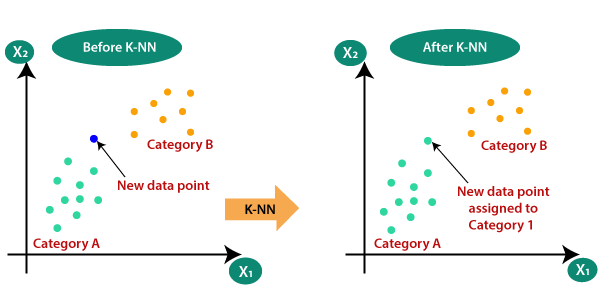

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 5)

X = np.round(knn_imputer.fit_transform(data[['training_hours']]))
pd.DataFrame(X).head()

,0
0,36.0
1,47.0
2,83.0
3,52.0
4,8.0


####  <b>Predict the Missing Values:</b> 
- Use the missing column as target and then Split the missing and non missing data column into test/train respectively. Now train the model and predict the missing column target in the test.

Libraries like impyute and datawig can be used for this purpose

## Feature Encoding

- We need encoding to convert our categorical data into numerical numbers. As machine learning models only understand numbers so all the other type of features need to be encoded before putting in the model.
- So Feature Encoding is the storing of numeric representation of the feature so that it's relation and postion can be preserved

In [ ]:
Categ_feat = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_type','last_new_job']
data[Categ_feat].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Pvt Ltd,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4


### Way's to do feature encoding

#### <b>Create your Own Mapping</b>

- create the dictionary mapping between the category and the values

In [ ]:
relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 

data.loc[:,'relevent_experience'] = data['relevent_experience'].map(relevent_experience_map)
data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_university_map)
data.loc[:,'education_level'] = data['education_level'].map(education_level_map)

#### <b>Label Encoding</b>

- In Label encoding, each label is converted into an integer value. we will be using the sklearn to do label encoding on `Gender` feature

In [ ]:
from sklearn import preprocessing
data['gender'].fillna('None',inplace=True)
le = preprocessing.LabelEncoder()
le.fit(data['gender'])
print(list(le.classes_))
print(le.transform(data['gender']))
print(list(le.inverse_transform([0, 1, 2, 3])))

LabelEncoder()

['Female', 'Male', 'None', 'Other']
[1 1 2 ... 2 1 1]
['Female', 'Male', 'None', 'Other']


#### <b>One Hot Encoding</b>

- Label encoding has disadvantage that the numeric values can be misinterpreted as having some sort of hierarchy/order in them.
- In One Hot Encoding, each category value is converted into a new column and assigned a 1 or 0 value.

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(data[['gender']])
enc.categories_
enc.transform(data[['gender']]).toarray()
enc.inverse_transform([[0, 1, 0, 0], [1, 0, 0, 0]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

[array(['Female', 'Male', 'None', 'Other'], dtype=object)]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

array([['Male'],
       ['Female']], dtype=object)

#### <b>Dummy Encoding</b>

- This data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables).
- One-hot encoding, for N categories uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

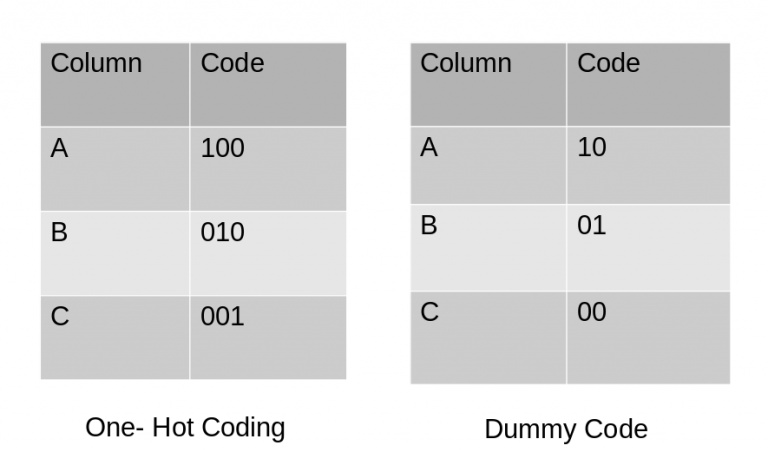

In [ ]:
data_encoded=pd.get_dummies(data=data['gender'])
data_encoded.head()

,Female,Male,None,Other
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


#### <b>Target Encoding</b>

- Target encoding is a Baysian encoding technique. It uses information from target variables to encode the categorical data.

- In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category..

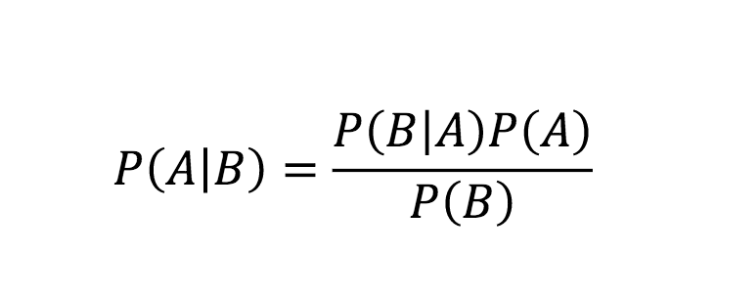

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 2.5 MB/s 


In [ ]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols='gender') 
encoder.fit_transform(data['gender'],data['target'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender
0,0.226192
1,0.226192
2,0.308951
3,0.308951
4,0.226192
...,...
8994,0.226192
8995,0.308951
8996,0.308951
8997,0.226192


## Standardize or Normalize

For Algorithms like

- linear and logistic regression
- nearest neighbors
- neural networks
- support vector machines
- PCA & LDA

you need to do normalization so that algorithm perform better and converge faster. Face problem like Gradient Exploding and Vanishing

- Tree Based models doesn't need normalization like Random Forest and Xgboost 

In [ ]:
data['training_hours'].max()
data['training_hours'].min()
data['city_development_index'].max()
data['city_development_index'].min()

336.0

1.0

0.949

0.448

#### <b>MinMaxScaler</b>

- MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. 
- MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['training_hours']])
scaler.data_max_
trans = scaler.transform(data[['training_hours']])
f'minimum value {sorted(trans)[0][0]} , maximum value is {sorted(trans)[-1][0]}'

MinMaxScaler(copy=True, feature_range=(0, 1))

array([336.])

'minimum value 0.0 , maximum value is 0.9999999999999999'

#### <b>StandardScaler</b>
- StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.
- StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['training_hours']])
scaler.mean_
trans = scaler.transform(data[['training_hours']])
f'minimum value {sorted(trans)[0][0]} , maximum value is {sorted(trans)[-1][0]}'

StandardScaler(copy=True, with_mean=True, with_std=True)

array([65.59988821])

'minimum value -1.084224689506514 , maximum value is 4.538312455265592'

#### <b>Normalizer</b>

- Normalizer works on the rows, not the columns!
- By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1.

In [ ]:
from sklearn.preprocessing import Normalizer
data.loc[:, "training_hours"] = data['training_hours'].fillna(data['training_hours'].mean())
data.loc[:, "city_development_index"] = data['city_development_index'].fillna(data['city_development_index'].mean())
transformer = Normalizer().fit(data[['training_hours','city_development_index']])
transformer.transform(data[['training_hours','city_development_index']])

array([[0.99967362, 0.02554721],
       [0.99986373, 0.01650839],
       [0.99997174, 0.00751786],
       ...,
       [0.99969483, 0.02470299],
       [0.99980942, 0.01952259],
       [0.99652072, 0.08334537]])

# Outlier Removal

 ### Using Normal distributions

- Use empirical relations of Normal distribution.
- The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.

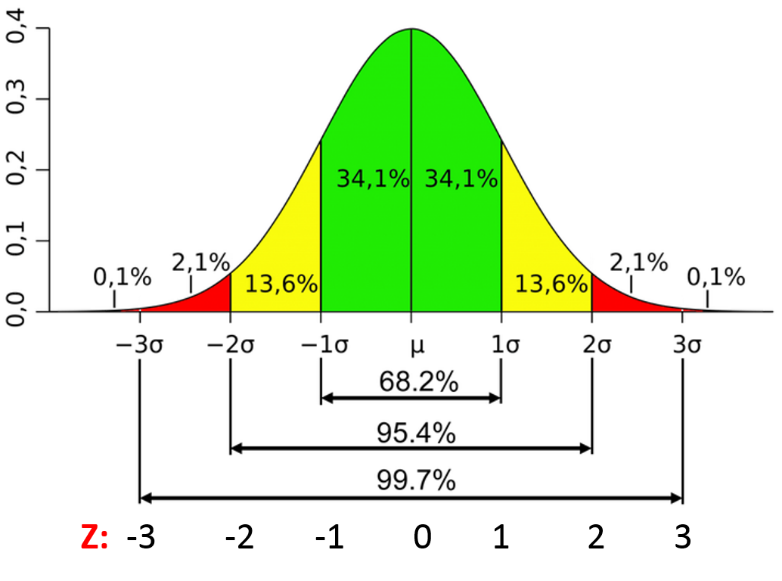

<Figure size 1152x360 with 0 Axes>

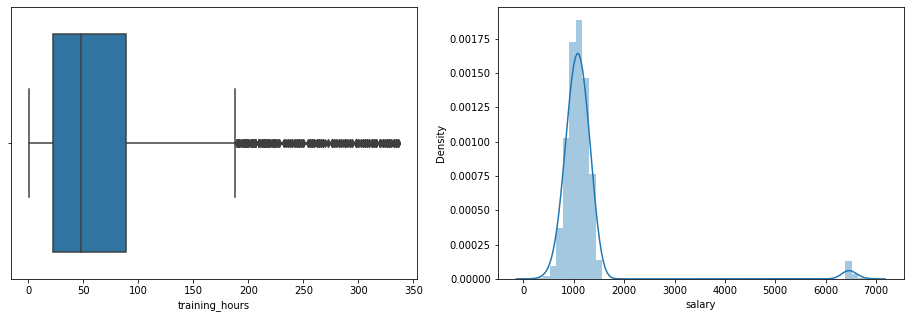

In [ ]:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(data['training_hours'])
plt.subplot(1,2,2)
sns.distplot(data['salary'])
plt.show()

## IQR Based Filtering

- The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers. Data Points outside Whisker
- where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

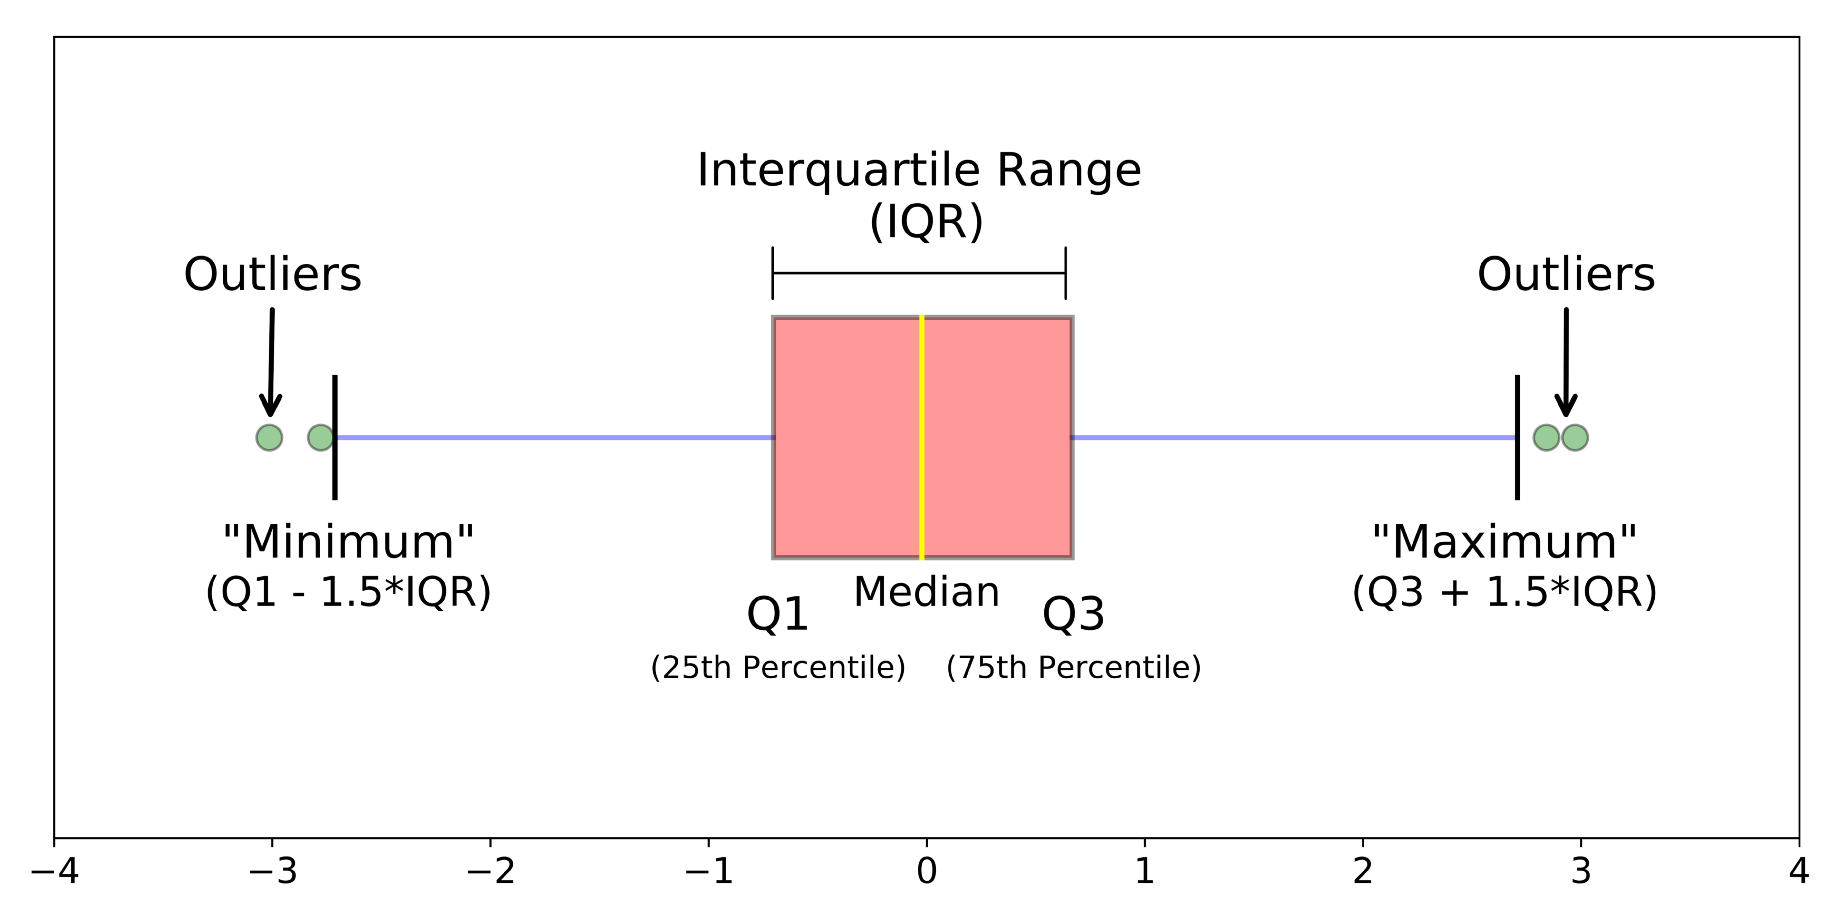

(8568, 14)

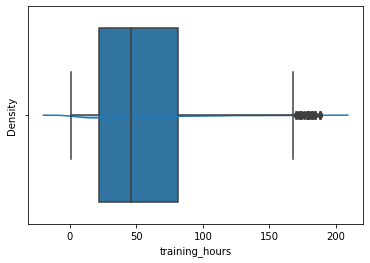

In [ ]:
percentile25 = data['training_hours'].quantile(0.25)
percentile75 = data['training_hours'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df = data[(data['training_hours'] <= upper_limit) & (data['training_hours'] >= lower_limit)]

new_df.shape
sns.distplot(new_df['training_hours'])
sns.boxplot(new_df['training_hours'])

## Winsorization

- This technique works by setting a particular threshold value
- While we remove the outliers using capping. we always maintain symmetry on both sides means if remove 3% from the right then in the left we also drop by 3%.

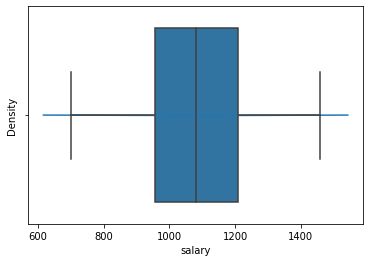

In [ ]:
upper_limit = data['salary'].quantile(0.97)
lower_limit = data['salary'].quantile(0.03)
                                       
new_df = data[(data['salary'] <= upper_limit) & (data['salary'] >= lower_limit)]

sns.distplot(new_df['salary'])
sns.boxplot(new_df['salary'])

# Cross Validation Strategy

## K Fold Cross Validation

- Randomly split your entire dataset into k Folds.
- For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
- Record the error you see on each of the predictions
- Repeat this until each of the k-folds has served as the test set
- The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

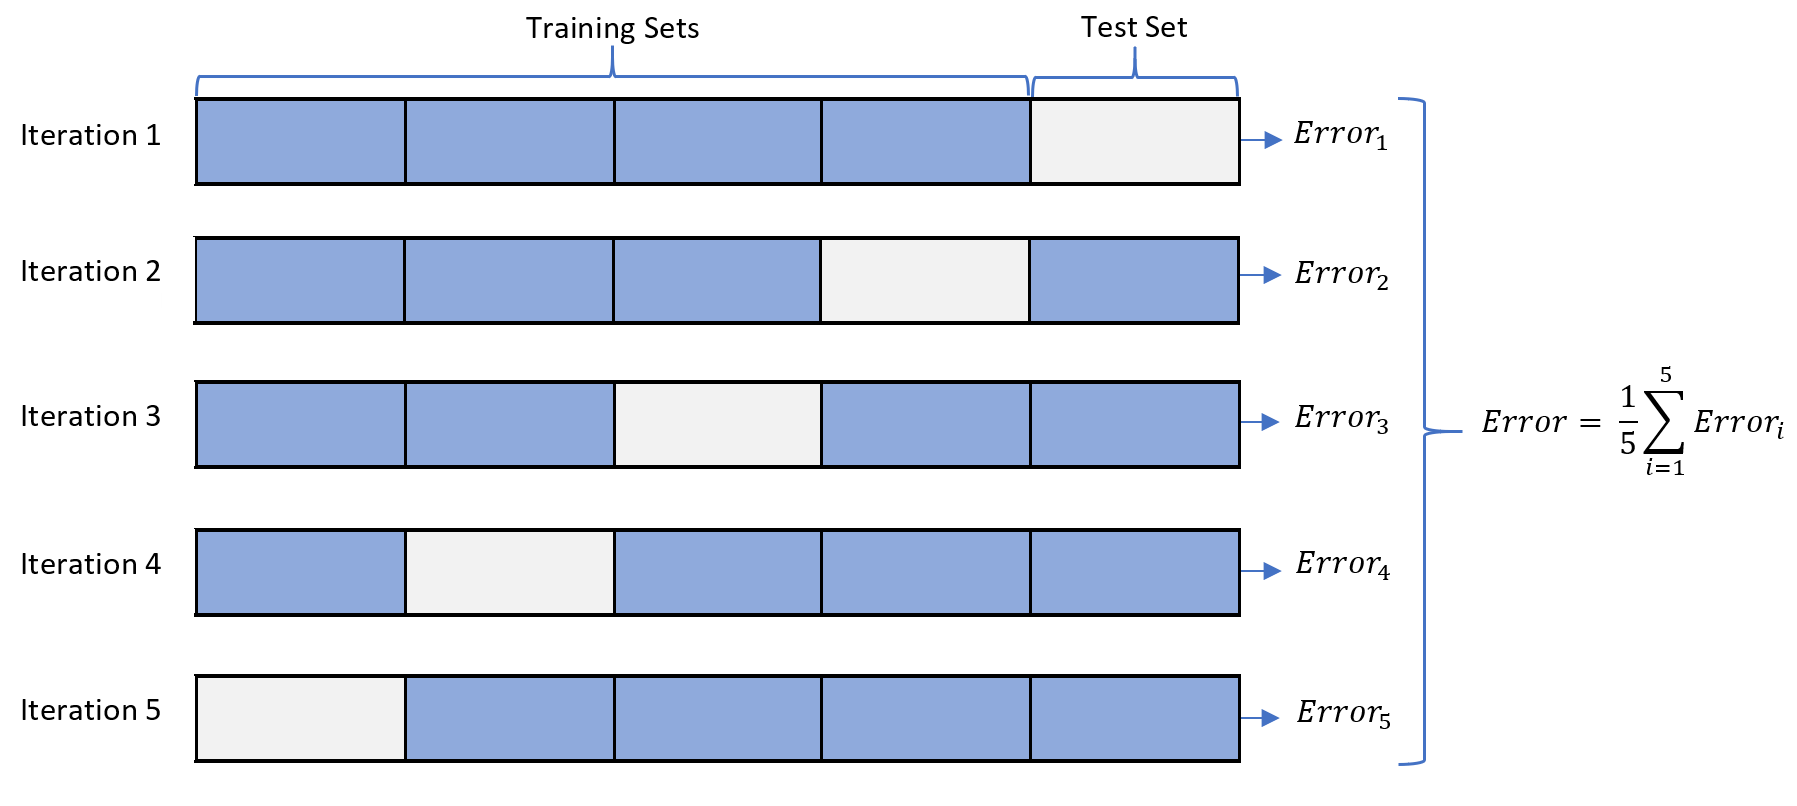

In [ ]:
data['target'].value_counts()

0    6767
1    2232
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(5, True, 1)
print(data.shape)
for train, test in kfold.split(data):
  print('train: %s, test: %s' % (train.shape, test.shape))
  print(data['target'][test].value_counts())

(8999, 14)
train: (7199,), test: (1800,)
0    1382
1     418
Name: target, dtype: int64
train: (7199,), test: (1800,)
0    1344
1     456
Name: target, dtype: int64
train: (7199,), test: (1800,)
0    1331
1     469
Name: target, dtype: int64
train: (7199,), test: (1800,)
0    1353
1     447
Name: target, dtype: int64
train: (7200,), test: (1799,)
0    1357
1     442
Name: target, dtype: int64


## Stratified K Fold

- Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. 
- For example, in a binary classification problem where class distribution is of 75/25% of the data, it is best to arrange the data such that in every fold, each class comprises of about the same Distribution

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, val_index in skf.split(data,data['target'].values): 
  print('train: %s, test: %s' % (train_index.shape, val_index.shape))
  print(data['target'][val_index].value_counts())

train: (7199,), test: (1800,)
0    1353
1     447
Name: target, dtype: int64
train: (7199,), test: (1800,)
0    1353
1     447
Name: target, dtype: int64
train: (7199,), test: (1800,)
0    1354
1     446
Name: target, dtype: int64
train: (7199,), test: (1800,)
0    1354
1     446
Name: target, dtype: int64
train: (7200,), test: (1799,)
0    1353
1     446
Name: target, dtype: int64


## Cross Validation for time series

- Splitting a time-series dataset randomly does not work because the time section of your data will be messed up
- Folds for time series cross valdiation are created in a forward chaining fashion
- Suppose we have a time series for yearly consumer demand for a product during a period of n years. Then we progressively create the folds like:


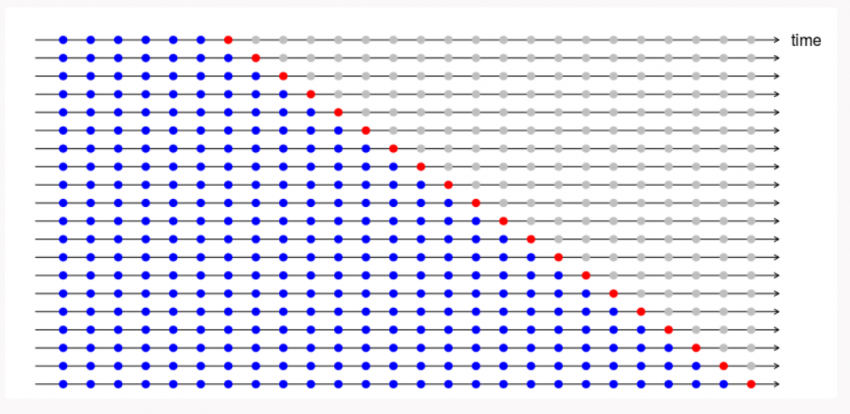

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1,2],[3,4]])
y = np.array([1, 2, 3, 4,5,6])
tscv = TimeSeriesSplit(n_splits=4)
for train_index, test_index in tscv.split(X):
     print("Train:", train_index, "Validation:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

Train: [0 1] Validation: [2]
Train: [0 1 2] Validation: [3]
Train: [0 1 2 3] Validation: [4]
Train: [0 1 2 3 4] Validation: [5]


## Adversarial Validation

- There are often cases where the test and train sets are very different.
- The idea is to check the degree of similarity between training and tests in terms of feature distribution.
- By combining train and test sets, assigning 0/1 labels (0 – train, 1-test) and evaluating a binary classification task.
- Then Sort the train set using the calculated probabilities and take top n% samples/rows as the validation set (n% is the fraction of the train set you want to keep in the validation set)

# Next Steps

Other Steps involved in the data preprocessing is to do:
- Target Class balance using oversampling or undersampling like applying random sampling or SMOTE etc.

Want to Learn More about Data Preprocessing and Cleaning Techniques: [How to Win a Data Science Competition](https://www.coursera.org/learn/competitive-data-science)

# References

- https://scikit-learn.org/stable/index.html
- https://pandas.pydata.org/
- https://github.com/lucky630/ML-Challenges/blob/master/Quartic/Quartic_kernel.ipynb
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
- https://www.kaggle.com/nkitgupta/who-will-leave-a-job
- https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
- https://github.com/awslabs/datawig
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://contrib.scikit-learn.org/category_encoders/
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
- https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
- https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/